In [1]:
import pandas as pd
from src.preprocess import load_clean_data
from src.topic_modelling import *
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafiqmazen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafiqmazen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/rafiqmazen/anaconda3/envs/poli/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = load_clean_data("clean_data.csv")

In [18]:
tweet_list = df.tweets.to_list()
P_leaning_tweet_list = df[df["leaning"]=="palestine"].tweets.to_list()
I_leaning_tweet_list = df[df["leaning"]=="israel"].tweets.to_list()
C_leaning_tweet_list = df[df["leaning"]=="center"].tweets.to_list()

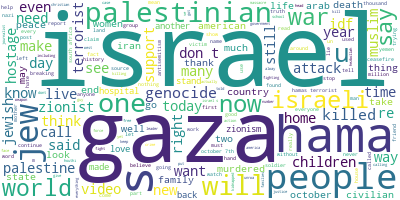

In [14]:
generate_wordcloud(df.tweets.to_list())

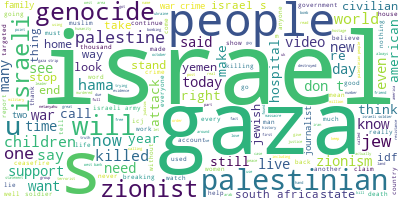

In [15]:
generate_wordcloud(P_leaning_tweet_list)

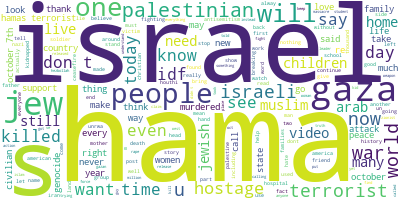

In [16]:
generate_wordcloud(I_leaning_tweet_list)

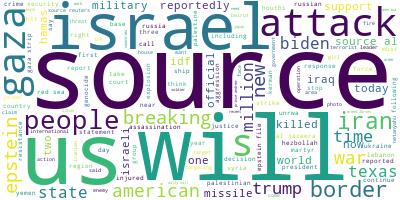

In [19]:
generate_wordcloud(C_leaning_tweet_list)

In [7]:
model = gensim_topic_modelling(tweet_list, num_topics=5, visualize = True, filepath="reports/all_tweets")

html saved to: reports/all_tweets_gensim_LDA.html


In [9]:
model = gensim_topic_modelling(P_leaning_tweet_list, num_topics=5, visualize = True, filepath="reports/palestine_leaning")

html saved to: reports/palestine_leaning_gensim_LDA.html


In [10]:
model = gensim_topic_modelling(I_leaning_tweet_list, num_topics=5, visualize = True, filepath="reports/israel_leaning")

html saved to: reports/israel_leaning_gensim_LDA.html


In [11]:
topic_model, topics, probs = bertopic_topic_modelling(tweet_list)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

In [20]:
topic_model.visualize_barchart(top_n_topics=14, n_words=5, custom_labels=False, title='Topic Word Scores', width=300, height=700)

In [12]:
topic_model, topics, probs = bertopic_topic_modelling(P_leaning_tweet_list)
topic_model.visualize_barchart(top_n_topics = 14, n_words = 20)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

In [18]:
topic_model, topics, probs = bertopic_topic_modelling(I_leaning_tweet_list)
topic_model.visualize_barchart(top_n_topics = 15, n_words = 20)

In [21]:
topic_model, topics, probs = bertopic_topic_modelling(C_leaning_tweet_list)
topic_model.visualize_barchart(top_n_topics = 15, n_words = 20)